In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from tqdm import *
import math as math
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('AAPL_5DAY.xlsx')

In [3]:
#Discard rows and columns containing null values
df = df.dropna(how='any')

In [4]:
#sort by date
#df = df.sort_values(by='date')
df = df.sort_values(by='DATE')

In [5]:
#choose_factor = [i for i in df.columns if i not in ['date','CLOSETOMORROW','ZSPREADTOMORROW']]
choose_factor = [i for i in df.columns if i not in ['DATE','ZSPREADTOMORROW']]

In [6]:
choose_feature = df[choose_factor]

In [7]:
choose_feature

,OPEN0,HIGH0,LOW0,CLOSE0,YTM0,ZSPREAD0,OPEN1,HIGH1,LOW1,CLOSE1,...,LOW3,CLOSE3,YTM3,ZSPREAD3,OPEN4,HIGH4,LOW4,CLOSE4,YTM4,ZSPREAD4
0,96.653,96.678,96.558,96.587,3.090,43.628,96.807,96.881,96.665,96.682,...,96.663,97.043,2.953,50.508,96.895,96.982,96.816,96.963,2.975,42.547
1,96.548,96.751,96.521,96.729,3.048,41.675,96.653,96.678,96.558,96.587,...,96.706,96.762,3.037,46.332,96.932,97.130,96.663,97.043,2.953,50.508
2,96.806,96.837,96.687,96.705,3.058,40.994,96.548,96.751,96.521,96.729,...,96.665,96.682,3.061,45.267,96.935,96.945,96.706,96.762,3.037,46.332
3,96.807,96.915,96.792,96.831,3.021,39.827,96.806,96.837,96.687,96.705,...,96.558,96.587,3.090,43.628,96.807,96.881,96.665,96.682,3.061,45.267
4,96.965,96.965,96.807,96.854,3.015,39.585,96.807,96.915,96.792,96.831,...,96.521,96.729,3.048,41.675,96.653,96.678,96.558,96.587,3.090,43.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,102.021,102.039,102.019,102.031,0.378,5.226,102.089,102.089,102.027,102.029,...,102.094,102.125,0.324,-0.332,102.120,102.135,102.115,102.128,0.326,0.047
623,102.031,102.033,102.024,102.033,0.372,6.008,102.021,102.039,102.019,102.031,...,102.075,102.089,0.349,2.383,102.115,102.133,102.094,102.125,0.324,-0.332
624,102.012,102.012,101.909,101.952,0.436,13.183,102.031,102.033,102.024,102.033,...,102.027,102.029,0.396,6.091,102.115,102.118,102.075,102.089,0.349,2.383
625,101.946,102.014,101.946,102.013,0.382,7.064,102.012,102.012,101.909,101.952,...,102.019,102.031,0.378,5.226,102.089,102.089,102.027,102.029,0.396,6.091


In [8]:
choose_label = df['ZSPREADTOMORROW']

In [9]:
#x_train = choose_feature.tail(200)
#y_train = choose_label.tail(200)

#x_test = choose_feature.head(80)
#y_test = choose_label.head(80)

x_train,x_test,y_train,y_test=train_test_split(choose_feature,choose_label,test_size=0.3,random_state=1)

In [10]:
y_train

374     6.599
506     2.741
19     17.522
371     0.768
358     7.615
        ...  
129    29.010
144    40.429
72     22.415
235    15.474
37     19.156
Name: ZSPREADTOMORROW, Length: 438, dtype: float64

In [11]:
## random forest
x_train

,OPEN0,HIGH0,LOW0,CLOSE0,YTM0,ZSPREAD0,OPEN1,HIGH1,LOW1,CLOSE1,...,LOW3,CLOSE3,YTM3,ZSPREAD3,OPEN4,HIGH4,LOW4,CLOSE4,YTM4,ZSPREAD4
374,103.901,103.905,103.679,103.690,0.394,10.321,103.873,103.902,103.850,103.900,...,103.783,103.836,0.335,2.255,103.725,103.823,103.714,103.797,0.361,5.386
506,102.936,102.961,102.926,102.926,0.314,2.797,102.931,102.937,102.929,102.936,...,102.904,102.950,0.318,1.456,102.980,102.980,102.940,102.954,0.319,1.994
19,97.694,97.842,97.670,97.793,2.748,13.788,97.925,97.927,97.676,97.710,...,97.804,98.071,2.664,12.378,97.551,97.800,97.397,97.782,2.749,17.634
371,103.796,103.842,103.783,103.836,0.335,2.255,103.725,103.823,103.714,103.797,...,103.663,103.765,0.380,7.110,103.705,103.705,103.659,103.660,0.429,10.510
358,103.355,103.554,103.352,103.539,0.508,17.895,103.715,103.724,103.352,103.352,...,103.555,103.558,0.509,15.220,103.834,103.847,103.722,103.724,0.439,5.563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,99.950,100.003,99.944,99.956,2.114,29.517,99.825,99.974,99.825,99.939,...,99.691,99.960,2.113,29.359,99.757,99.819,99.723,99.723,2.190,31.263
144,100.511,100.557,100.372,100.512,1.929,43.346,100.521,100.534,100.089,100.221,...,99.799,99.943,2.119,27.509,100.012,100.035,99.960,100.005,2.098,28.049
72,98.165,98.266,98.149,98.265,2.640,24.179,98.210,98.232,98.133,98.133,...,98.053,98.099,2.690,24.211,98.174,98.174,98.061,98.063,2.700,24.248
235,100.753,100.753,100.672,100.691,1.839,15.621,100.647,100.840,100.640,100.807,...,100.595,100.678,1.845,21.548,100.754,100.754,100.593,100.596,1.876,21.837


In [12]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score of random forest model：\n",r2_score(y_test,y_pred))

Mean Absolute Error: 3.162861005291006
Mean Squared Error: 34.07227672930876
Root Mean Squared Error: 5.837146283014395
R^2 Score of random forest model：
 0.8921091591543654


In [14]:
importances = forest.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
5,ZSPREAD0,0.756875
11,ZSPREAD1,0.106586
17,ZSPREAD2,0.034566
4,YTM0,0.023706
3,CLOSE0,0.012048
10,YTM1,0.007547
23,ZSPREAD3,0.006355
2,LOW0,0.006139
25,HIGH4,0.004883
24,OPEN4,0.004637


In [15]:
plots = pd.DataFrame(y_pred,y_test).reset_index()

In [16]:
plots.columns = ['true','predict']

<AxesSubplot:>

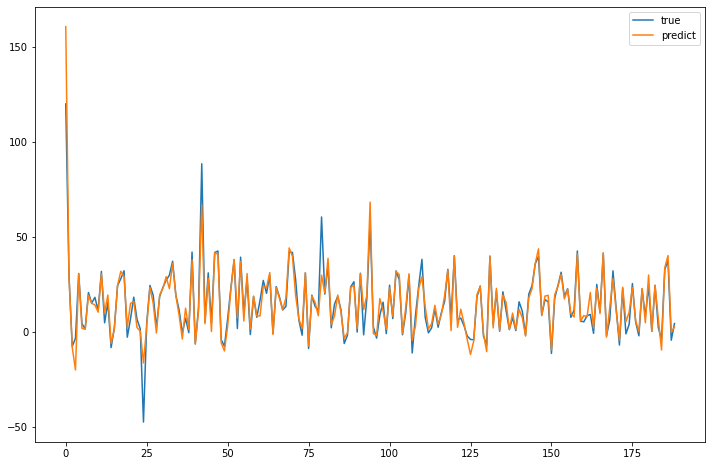

In [17]:
plots.plot(figsize=(12,8))

In [18]:
## LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression  # 线性回归
linearmodel = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linearmodel.fit(x_train,y_train)   # 线性回归建模
predicted = linearmodel.predict(x_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R^2 Score of linear model：\n",r2_score(y_test,predicted))

Mean Absolute Error: 3.289573503587016
Mean Squared Error: 20.09626055113101
Root Mean Squared Error: 4.482885293104321
R^2 Score of linear model：
 0.9363646149642414


<AxesSubplot:>

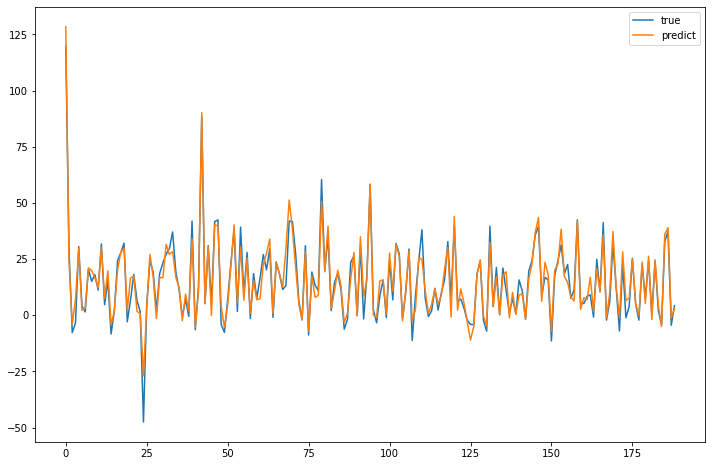

In [20]:
plots = pd.DataFrame(predicted,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))


In [21]:
##ridge model

In [22]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha=10)
ridgemodel.fit(x_train,y_train)   # 岭回归建模
ridge_pred = ridgemodel.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("R^2 Score of ridge model：\n",r2_score(y_test,ridge_pred))

Mean Absolute Error: 2.9690213145484536
Mean Squared Error: 23.901422930893485
Root Mean Squared Error: 4.888908153247868
R^2 Score of ridge model：
 0.9243154592248598


<AxesSubplot:>

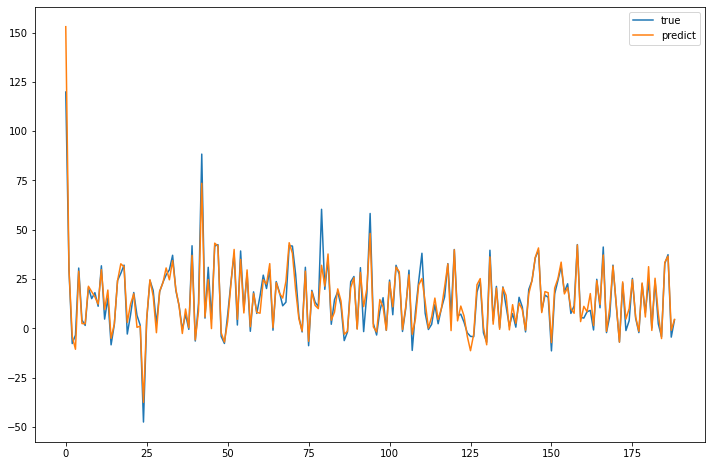

In [23]:
plots = pd.DataFrame(ridge_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [24]:
#KNN

In [25]:
from sklearn import neighbors
KNN_model = neighbors.KNeighborsRegressor()
KNN_model.fit(x_train,y_train)
KNN_pred = KNN_model.predict(x_test)

print('Mean Absolute Error of KNN_model:', metrics.mean_absolute_error(y_test, KNN_pred))
print('Mean Squared Error of KNN_model:', metrics.mean_squared_error(y_test, KNN_pred))
print('Root Mean Squared Error of KNN_model:',np.sqrt(metrics.mean_squared_error(y_test, KNN_pred)))
print("R^2 Score of KNN model：",r2_score(y_test,KNN_pred))

Mean Absolute Error of KNN_model: 3.4040423280423284
Mean Squared Error of KNN_model: 42.595796525714285
Root Mean Squared Error of KNN_model: 6.526545527743929
R^2 Score of KNN model： 0.8651191894172519


<AxesSubplot:>

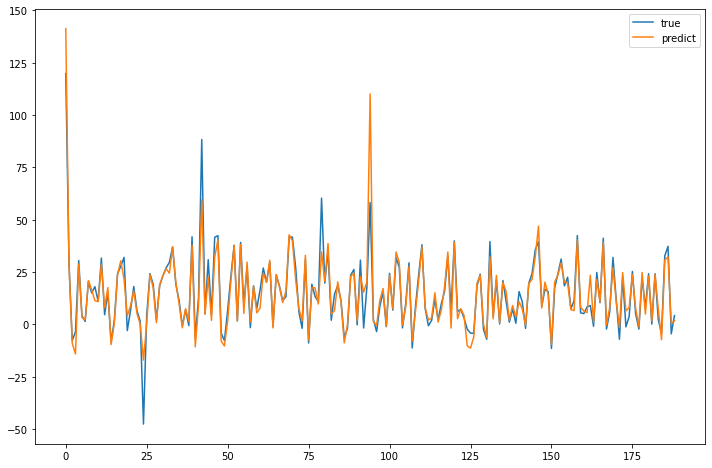

In [26]:
plots = pd.DataFrame(KNN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [27]:
#SVM

In [28]:
from sklearn.svm import SVR
#线性核函数 Linear kernel function
lin_svr = SVR(kernel='linear')
lin_svr.fit(x_train,y_train)
lin_svr_pred=lin_svr.predict(x_test)
print('Mean Absolute Error of lin_svr:', metrics.mean_absolute_error(y_test, lin_svr_pred))
print('Mean Squared Error of lin_svr:', metrics.mean_squared_error(y_test, lin_svr_pred))
print('Root Mean Squared Error of lin_svr:',np.sqrt(metrics.mean_squared_error(y_test, lin_svr_pred)))
print("R^2 Score of lin_svr：\n",r2_score(y_test,lin_svr_pred))

#多项式核函数 Polynomial kernel function
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train,y_train)
poly_svr_pred=poly_svr.predict(x_test)
print('Mean Absolute Error of poly_svr:', metrics.mean_absolute_error(y_test, poly_svr_pred))
print('Mean Squared Error of poly_svr:', metrics.mean_squared_error(y_test, poly_svr_pred))
print('Root Mean Squared Error of poly_svr:',np.sqrt(metrics.mean_squared_error(y_test, poly_svr_pred)))
print("R^2 Score of poly_svr：\n",r2_score(y_test,poly_svr_pred))

#径向基核函数 Radial basis kernel function
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train,y_train)
rbf_svr_pred=rbf_svr.predict(x_test)
print('Mean Absolute Error of rbf_svr:', metrics.mean_absolute_error(y_test, rbf_svr_pred))
print('Mean Squared Error of rbf_svr:', metrics.mean_squared_error(y_test, rbf_svr_pred))
print('Root Mean Squared Error of rbf_svr:',np.sqrt(metrics.mean_squared_error(y_test, rbf_svr_pred)))
print("R^2 Score of rbf_svr：\n",r2_score(y_test,rbf_svr_pred))

Mean Absolute Error of lin_svr: 2.767406499434029
Mean Squared Error of lin_svr: 22.702798910587315
Root Mean Squared Error of lin_svr: 4.764745419283943
R^2 Score of lin_svr：
 0.9281109365402154
Mean Absolute Error of poly_svr: 7.503535194883805
Mean Squared Error of poly_svr: 146.08994934911513
Root Mean Squared Error of poly_svr: 12.086767531028102
R^2 Score of poly_svr：
 0.5374019881443959
Mean Absolute Error of rbf_svr: 5.3398787796053595
Mean Squared Error of rbf_svr: 123.18392883306942
Root Mean Squared Error of rbf_svr: 11.098825560980288
R^2 Score of rbf_svr：
 0.6099345586426183


<AxesSubplot:>

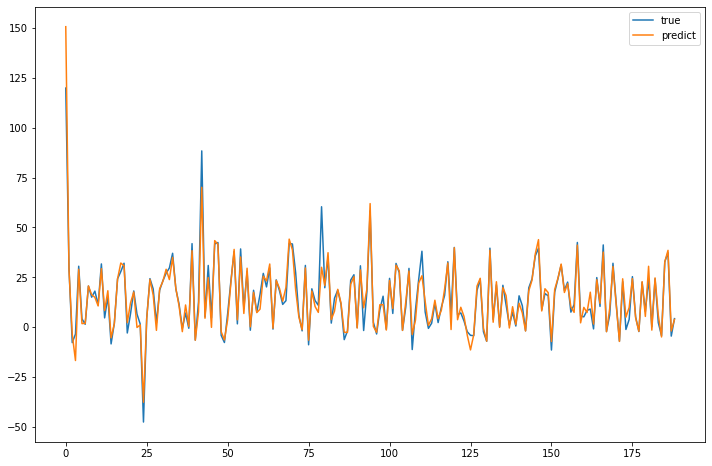

In [29]:
plots = pd.DataFrame(lin_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

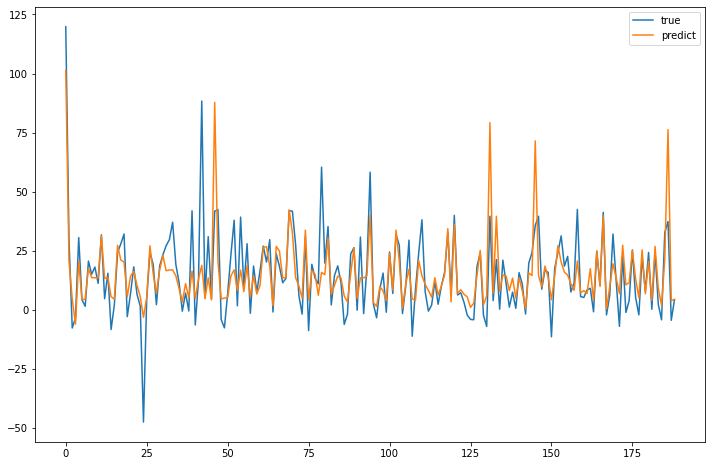

In [30]:
plots = pd.DataFrame(poly_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

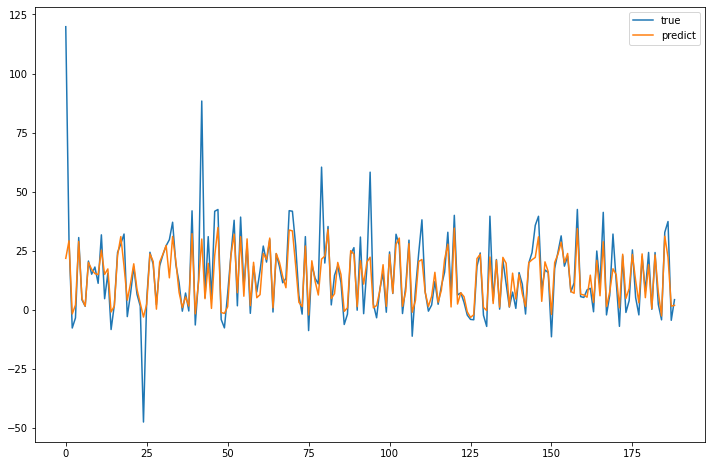

In [31]:
plots = pd.DataFrame(rbf_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [32]:
CSCO = pd.read_excel('CSCO_5DAY.xlsx')
#CSCO = df.dropna(how='any')
#CSCO = df.sort_values(by='date')
MSFT = pd.read_excel('MSFT_5DAY.xlsx')
#MSFT = df.dropna(how='any')
#MSFT = df.sort_values(by='date')
AAPL = pd.read_excel('AAPL_5DAY.xlsx')
#AAPL = df.sort_values(by='date')
#AAPL = df.dropna(how='any')

In [33]:
COMB = pd.concat([CSCO,MSFT,AAPL])

In [34]:
COMB.to_excel("COMB_5DAY.xlsx")

In [35]:
#ANN

In [45]:
from sklearn.neural_network import MLPRegressor
ANN=MLPRegressor()
ANN.fit(x_train,y_train.astype('int'))
ANN_pred=ANN.predict(x_test)

print('Mean Absolute Error of ANN_model:', metrics.mean_absolute_error(y_test, ANN_pred))
print('Mean Squared Error of ANN_model:', metrics.mean_squared_error(y_test, ANN_pred))
print('Root Mean Squared Error of ANN_model:',np.sqrt(metrics.mean_squared_error(y_test, ANN_pred)))
print("R^2 Score of ANN model：",r2_score(y_test,ANN_pred))

Mean Absolute Error of ANN_model: 4.077129054511101
Mean Squared Error of ANN_model: 46.00554109252652
Root Mean Squared Error of ANN_model: 6.782738465585012
R^2 Score of ANN model： 0.8543221355160736


<AxesSubplot:>

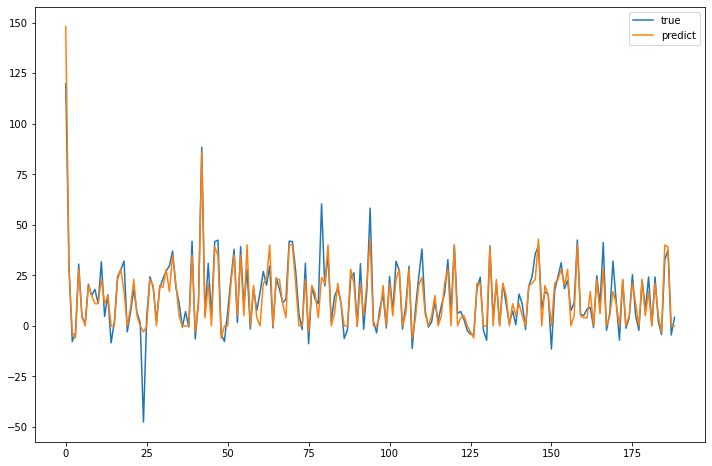

In [37]:
plots = pd.DataFrame(ANN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [38]:
#ARIMA

In [39]:
#from statsmodels.tsa.arima.model import ARIMA
#ARIMA_MODEL = ARIMA(df,order=(5,1,0))
#ARIMA_MODEL = ARIMA_MODEL.fit(x_train,y_train)

In [56]:
from sklearn.ensemble import StackingRegressor
X ,y = choose_feature,choose_label
estimators = [
     ('RF', forest),
     ('Linearmodel', linearmodel),
     ('ANN',ANN),
     ('ridgemodel',ridgemodel),
     ('KNN',KNN_model)
 ]
stacking_reg = StackingRegressor(
     estimators=estimators,
     final_estimator=lin_svr
)
stacking_reg.fit(x_train, y_train)
stacking_pred = stacking_reg.predict(x_test)


print('Mean Absolute Error of stacking_reg:', metrics.mean_absolute_error(y_test, stacking_pred))
print('Mean Squared Error of stacking_reg:', metrics.mean_squared_error(y_test, stacking_pred))
print('Root Mean Squared Error of stacking_reg:',np.sqrt(metrics.mean_squared_error(y_test, stacking_pred)))
print("R^2 Score of stacking_reg：",r2_score(y_test,stacking_pred))

Mean Absolute Error of stacking_reg: 2.858771430183395
Mean Squared Error of stacking_reg: 22.81281768115644
Root Mean Squared Error of stacking_reg: 4.776276549903328
R^2 Score of stacking_reg： 0.9277625589498415


In [54]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([
     ('RF', forest),
     ('Linearmodel', linearmodel),
     ('ridgemodel',ridgemodel),
     ('KNN',KNN_model),
     ('ANN',ANN),
     ('lin_svr',lin_svr)
 ])

er.fit(x_train, y_train)
er_pred = er.predict(x_test)

print('Mean Absolute Error of voting regression:', metrics.mean_absolute_error(y_test, er_pred))
print('Mean Squared Error of voting regression:', metrics.mean_squared_error(y_test, er_pred))
print('Root Mean Squared Error of voting regression:',np.sqrt(metrics.mean_squared_error(y_test, er_pred)))
print("R^2 Score of voting regression：",r2_score(y_test,er_pred))

Mean Absolute Error of voting regression: 2.8134838096027566
Mean Squared Error of voting regression: 21.635787948657416
Root Mean Squared Error of voting regression: 4.651428592234585
R^2 Score of voting regression： 0.9314896573339185
